# Predicting a heart disease

>The aim of this project is simple: can a machine learning model predict wether or not a patient has a heart disease, based on his medical attributes? Which model is better in terms of accuracy?

![alt text](https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/slideshows/did_you_know_this_could_lead_to_heart_disease_slideshow/650x350_did_you_know_this_could_lead_to_heart_disease_slideshow.jpg)

**We'll take the following approach:**
0. Overview
1. Data
2. Evaluation
3. Features
4. Modelling
6. Experimentation

## 0. Overview
Heart disease describes a range of conditions that affect your heart. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease; heart rhythm problems (arrhythmias); and heart defects you're born with (congenital heart defects), among others.

The term "heart disease" is often used interchangeably with the term "cardiovascular disease." Cardiovascular disease generally refers to conditions that involve narrowed or blocked blood vessels that can lead to a heart attack, chest pain (angina) or stroke. Other heart conditions, such as those that affect your heart's muscle, valves or rhythm, also are considered forms of heart disease.

Many forms of heart disease can be prevented or treated with healthy lifestyle choices.

## 1. Data

>This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them, and we'll talk about them.

The original set is from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also an available version on Kaggle: https://www.kaggle.com/ronitf/heart-disease-uci

## 2. Evaluation

>This is a classification problem, and establishing wether or not a patient as a heart disease is an important matter, that's the reason why we will be looking for the best accuracy possible.

## 3. Features

**Creating a data dictionary**

1. age - age in years
2. sex - (1= Male, 0 = Female)
3. cp - chest pain type:
 * 0: Typical angina: chest pain related decrease blood supply to the heart"
 * 1: Atypical angina: chest pain not related to heart
 * 2: Non-anginal pain: typically esophageal spasms (non heart related)
 * 3: Asymptomatic: chest pain not showing signs of disease
 
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
  * serum = LDL + HDL + .2 * triglycerides
  * above 200 is cause for concern

6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
       * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
  * 0: Nothing to note
  * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
  * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
   * 0: Upsloping: better heart rate with excercise (uncommon)
   * 1: Flatsloping: minimal change (typical healthy heart)
   * 2: Downslopins: signs of unhealthy heart

12. ca - number of major vessels (0-3) colored by flourosopy
   * colored vessel means the doctor can see the blood passing through
   * the more blood movement the better (no clots)
13. thal - thalium stress result
   * 1,3: normal
   * 6: fixed defect: used to be defect but ok now
   * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

### Preparing the tools we'll use

In [117]:
## Regular exploratory data analysis (EDA) and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Important modules from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### Importing the data

In [3]:
df = pd.read_csv("heart-disease.csv")
df.shape # That means we have 303 samples (rows) and 14 columns (features)

(303, 14)

### EDA - Exploratory Data Analysis
The aim is to find out more about our data and what we're trying to achieve, what kind of data we have and, if we have missing values, how we treat them?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


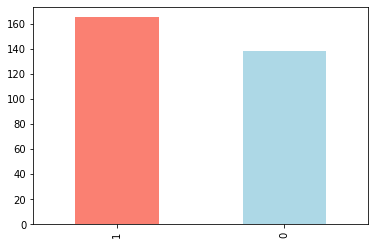

In [18]:
# How many of each classes there are? 
# Meaning how many patients in the set have/have not a heart disease?
df["target"].value_counts().plot(kind = 'bar', color = ["salmon", "lightblue"]);

As we see it's a balanced classification problem, meaning we have a similar amount of examples in both classes

In [28]:
# Let's check if we have missing values:
df.isna().sum() # Luckily not!

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Comparison between the heart disease frequency and patient's gender

In [29]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

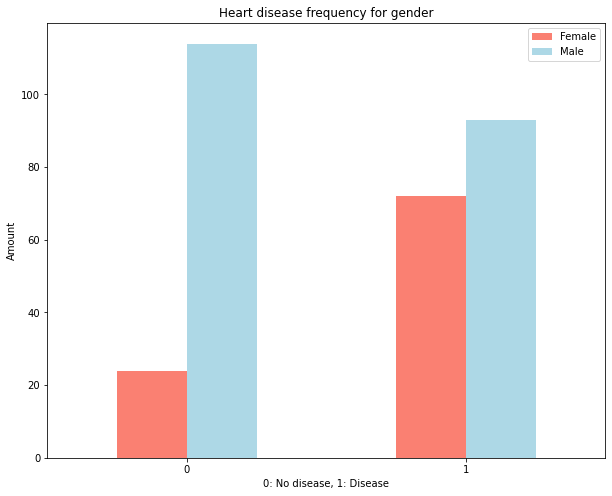

In [38]:
pd.crosstab(df.target, df.sex).plot(kind = 'bar', figsize = (10,8), color = ["salmon", "lightblue"]);
plt.title("Heart disease frequency for gender")
plt.xlabel("0: No disease, 1: Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation = 0);

### Heart disease frequency per patient's cholestorol level and max heart rate

One of the first correlation we might think of is the one between the heart disease frequency and someone's cholestorol level or the maximum heart rate achieved, so we'll proceed by making two scatter plots and comparing those features

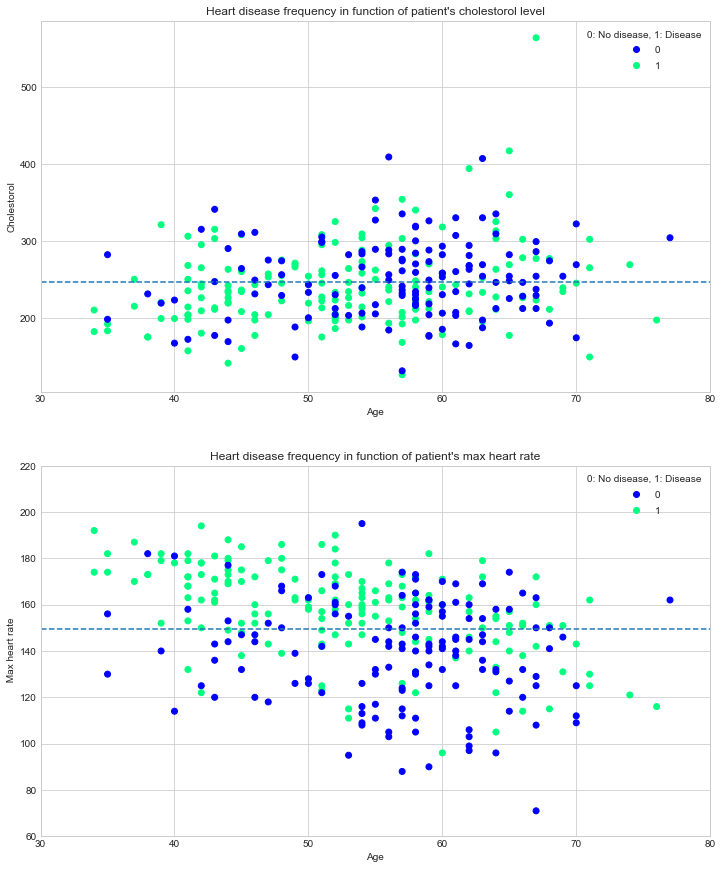

In [116]:
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(12,15))

scatter = ax0.scatter(x=df['age'], y=df['chol'], c=df['target'], cmap='winter');
ax0.set(title='Heart disease frequency in function of patient\'s cholestorol level', xlabel="Age", ylabel="Cholestorol");
ax0.legend(*scatter.legend_elements(), title="0: No disease, 1: Disease");
ax0.set_xlim([30,80])
ax0.axhline(y=df["chol"].mean(), linestyle="--");

scatter = ax1.scatter(x=df['age'], y=df["thalach"], c=df["target"], cmap='winter');
ax1.set(title='Heart disease frequency in function of patient\'s max heart rate', xlabel="Age", ylabel=" Max heart rate");
ax1.set_xlim([30,80])
ax1.set_ylim([60,220])
ax1.legend(*scatter.legend_elements(), title="0: No disease, 1: Disease");
ax1.axhline(y=df["thalach"].mean(), linestyle='--');

### Heart disease frequency per patient's chest pain type
Another interesting correlation might be between a heart disease and a type of chest pain. We'll first resume which types of chest pain we're dealing with:
* 0: Typical angina: chest pain related decrease blood supply to the heart"
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

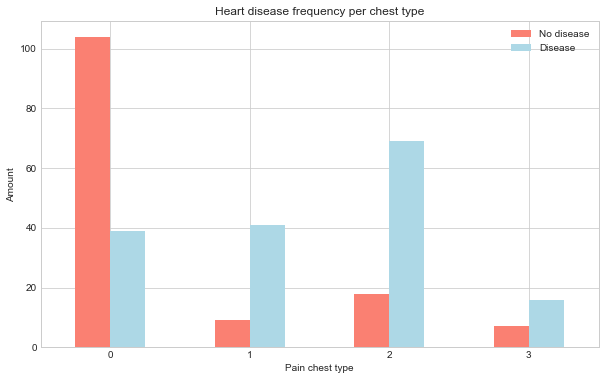

In [91]:
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(10,6), color = ["salmon", "lightblue"]);
plt.title("Heart disease frequency per chest type")
plt.xlabel("Pain chest type")
plt.ylabel("Amount")
plt.legend(["No disease", "Disease"])
plt.xticks(rotation=0);

### Correlation matrix
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.
* A higher positive value, means a potential positive correlation
* A higher negative value, means a potential negative correlation

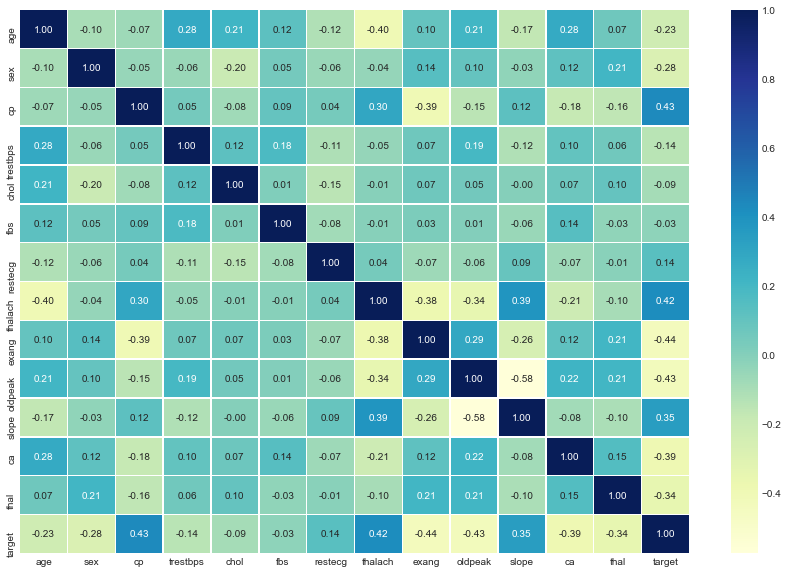

In [96]:
corr_matrix = df.corr()
fix, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix, annot = True, linewidths= 0.5, fmt = ".2f", cmap = "YlGnBu");

## 4. Modelling
In this section our focuse will be on preparing our data in order to be processed by a model.

We'll experiment with different Machine Learning models

**We will now split our data into dependent and independent variables**

In [97]:
X = df.drop("target", axis = 1)
y = df.target

It's important to train the model with a percentage of our data

In [98]:
np.random.seed(42) # So we can reproduce our results

# Split the data into a train and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

**It's time now to build a Machine Learning model:**
* We'll train it (finding patterns) on our training set
* We'll test it (use the found patterns) on the test set

We might ask ourselves: which model should we use?

We know it's a classification problem (wether or not a patient has a heart disease), and due to the low amount of samples (300) in our set we might try:
* Logistic Regression
* K-Nearest Neighbors Classifier
* Random Forest Classifier



In [107]:
models = {"Logistic Regression": LogisticRegression(), 
          "KNN": KNeighborsClassifier(), 
          "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    This function fits and evaluates given machine learning models: 
    models: a dictionary with the instantiated models
    X_train: training data (without labels)
    X_test: testing data (without labels)
    y_train: training labels
    y_test: testing labels
    """
    np.random.seed(42)
    # Creating an empty dictionary to fill
    model_scores = {} 
    
    #Looping through all the models, fit them and evaluate them
    for name, model in models.items(): 
        model.fit(X_train, y_train)
    # Appending each model's score to model_score    
        model_scores[name] = model.score(X_test, y_test)
    return model_scores
    

In [108]:
model_scores = fit_and_score(models = models, 
                             X_train = X_train, 
                             X_test = X_test, 
                             y_train = y_train, 
                             y_test = y_test)
model_scores

C:\Users\aless\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model comparison

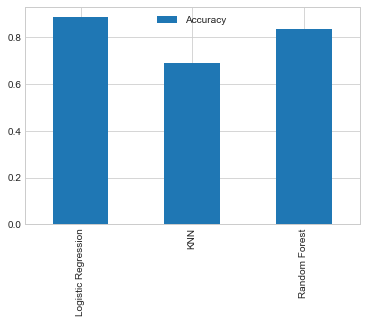

In [110]:
model_compare = pd.DataFrame(model_scores, index = ["Accuracy"])
model_compare.T.plot.bar();

What we obtained is what's called a 'Baseline Model' because we used the model's default hyperparameters

We know the first predictions of a model are not the most reliable ones

We might take a look at:
* Hyperparameter tuning
* Feature importance
* Confusion Matrix
* Cross validation
* Precision
* Recall
* F1 score
* Classification Report
* ROC Curve, Area under the curve (AUC)
    

### Hyperparameter Tuning

**Tuning KNN**: by reading the documentation I found n_neighbors as one of the parameter (5 by default)

Maximum KNN score on the test data: 75.41%


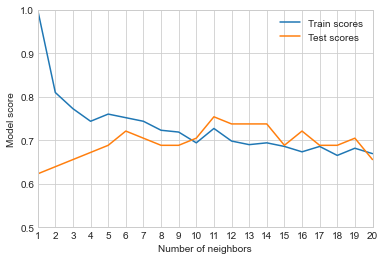

In [121]:
training_scores = []
test_scores = []

neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Update the scores lists
    training_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

plt.plot(neighbors, training_scores, label='Train scores')
plt.plot(neighbors, test_scores, label='Test scores')
plt.ylim([0.5, 1])
plt.xlim([1,20])
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")




Besides the successful Hyperparameter tuning on the KNN model, it didn't quite reach the other models accuracy, so we're going to discard KNN for now.

### Hyperparameter tuning with RandomizedSearchCV

Having KNN model discarded, we'll now tune:
* LogisticRegression()
* RandomForestClassifier()

In [128]:
## Creating a Hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20), 
                "solver": ["liblinear"]}
## Creating a Hyperparameter grid for RandomForestClassifier
# We'll use arange because it's highly recommended to use continuous distributions for continuous parameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50), 
           "max_depth": [None, 3, 5, 10], 
           "min_samples_split": np.arange(2, 20, 2), 
           "min_samples_leaf": np.arange(1, 20, 2)}


We will now tune the models with the respective grid, using RandomizedSearchCV

**Tuning LogisticRegression**

In [123]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(), 
                                param_distributions = log_reg_grid, 
                                cv = 5, 
                                n_iter = 20, 
                                verbose = True)
rs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [127]:
print(f'The best parameters in our grid are: {rs_log_reg.best_params_}')
print(f'Model\'s score: {rs_log_reg.score(X_test, y_test)*100:.2f}%')


The best parameters in our grid are: {'solver': 'liblinear', 'C': 0.23357214690901212}
Model's score: 88.52%


Unfortunately, we didn't end up improving our previous LogisticRegression's accuracy

**Tuning RandomForestClassifier**

In [129]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                                param_distributions = rf_grid, 
                                cv = 5, 
                                n_iter = 20, 
                                verbose = True)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [130]:
print(f'The best parameters in our grid are: {rs_rf.best_params_}')
print(f'Model\'s score: {rs_rf.score(X_test, y_test)*100:.2f}%')


The best parameters in our grid are: {'n_estimators': 210, 'min_samples_split': 4, 'min_samples_leaf': 19, 'max_depth': 3}
Model's score: 86.89%


## Hyperparameter tuning with GridSearchCV

We ended up improving our previous RandomForestClassifier's accuracy, but it didn't reach the LogisticRegressor model, so we might discard RandomForestClassifier for now and focuse more on the latter.

In [135]:
log_reg_grid = {"C": np.logspace(-4, 4, 30), 
                "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(), 
                                param_grid = log_reg_grid, 
                                cv = 5, 
                                verbose = True)

gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished


In [136]:
print(f'The best parameters in our grid are: {gs_log_reg.best_params_}')
print(f'Model\'s score: {gs_log_reg.score(X_test, y_test)*100:.2f}%')

The best parameters in our grid are: {'C': 0.20433597178569418, 'solver': 'liblinear'}
Model's score: 88.52%


## Evaluating the tuned classifier, beyond accuracy
In the last section we couldn't get to improve the accuracy of the Logistic Regressor, which is still the best model in this project so far, so we'll stick with it.

Before going beyond accuracy in terms of evaluation, we need to make some predictions on our data, in order to compare them with the actual true labels

**ROC curve**

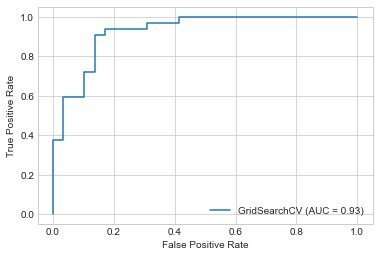

In [144]:
y_preds = gs_log_reg.predict(X_test)

plot_roc_curve(gs_log_reg, X_test, y_test);

**Confusion Matrix**

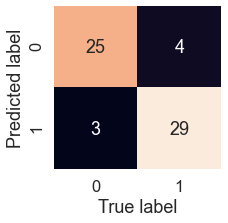

In [148]:
sns.set(font_scale = 1.5)
def plot_conf_matrix(y_test, y_preds):
    """
    This function plots a confusion matrix using seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), 
                                            annot = True, 
                                            cbar = False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_matrix(y_test, y_preds)

**Classification report**

In [149]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



**Cross-validated accuracy, precision, recall, f1 score**

We'll be using cross_val_score(), so we'll need to create a new classifier with the best parameters of gs_log_reg

In [152]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

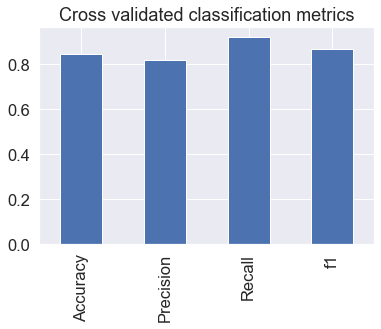

In [163]:
clf = LogisticRegression(C = 0.20433597178569418, solver = 'liblinear')
# Cross-validated accuracy
cv_accuracy = (cross_val_score(clf, X, y, cv = 5, scoring = 'accuracy')).mean()

# Cross-validated precision
cv_precision = (cross_val_score(clf, X, y, cv = 5, scoring = 'precision')).mean()

# Cross- validated recall
cv_recall = (cross_val_score(clf, X, y, cv = 5, scoring = 'recall')).mean()

# Cross-validated f1 score
cv_f1 = (cross_val_score(clf, X, y, cv = 5, scoring = 'f1')).mean()

cv_metrics = pd.DataFrame({"Accuracy": cv_accuracy, "Precision": cv_precision, "Recall": cv_recall, "f1": cv_f1}, index=[0])
cv_metrics.T.plot.bar(title = 'Cross validated classification metrics', legend = False);




### Feature importance

Which features contributed the most to the outcomes of our model? And how? One way to actually find feature importance for a certain model is to look it up on internet and search it, and that's what I did for our Logistic Regression model

In [164]:
clf = LogisticRegression(C = 0.20433597178569418, solver = 'liblinear')

clf.fit(X_train, y_train);

# Check coef_
clf.coef_


array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

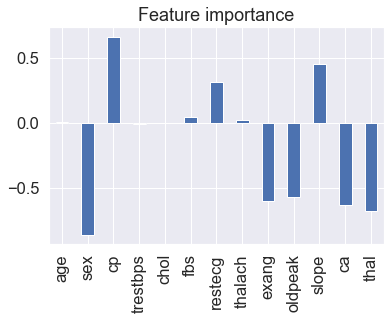

In [166]:
# Match coef_ coefficients to our dataframe columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))

# Let's visualize it
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title = "Feature importance", legend = False);

That means chest pain, restecg and ca (number of major vessels) are the features that most helped our model to predict the target (wether or not a patient has a heart disease)

## 6. Experimentation

**If we haven't meet a specific evaluation metric, we may ask ourselves:**
* Could we collect more data and samples?
* Could we try a better model? Maybe improve the current one?

>At the end of the day, it's all about experimentation